In [2]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [5]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [6]:
file_path= os.path.abspath ('/content/drive/My Drive/INTRO TO AI/CustomerChurn_dataset.csv')

In [7]:
customerchurn = pd.read_csv(file_path)

In [8]:
df= pd.DataFrame(customerchurn)

In [9]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
df.drop("customerID", axis = True, inplace = True)

In [11]:

#checking the number of null values in each column
missing_values = df.isnull().sum()
print(missing_values)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [13]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [14]:
#creating a subset of the categorical columns from the dataset
categorical_attributes = df.select_dtypes(include=['object', 'category']).columns
attribute_names = categorical_attributes
attribute_names

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [15]:
categorical_attributes = pd.DataFrame()

In [18]:
#encoding the categorical columns

encoders= {}

for i in attribute_names:

  label_encoder = LabelEncoder()
  categorical_attributes[i] = label_encoder.fit_transform(df[i])

  encoders[i] = label_encoder



In [50]:
for column, encoder in encoders.items():
    print(f"{column} label mapping: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}")
    print()

gender label mapping: {'Female': 0, 'Male': 1}

Partner label mapping: {'No': 0, 'Yes': 1}

Dependents label mapping: {'No': 0, 'Yes': 1}

PhoneService label mapping: {'No': 0, 'Yes': 1}

MultipleLines label mapping: {'No': 0, 'No phone service': 1, 'Yes': 2}

InternetService label mapping: {'DSL': 0, 'Fiber optic': 1, 'No': 2}

OnlineSecurity label mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}

OnlineBackup label mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}

DeviceProtection label mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}

TechSupport label mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}

StreamingTV label mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}

StreamingMovies label mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}

Contract label mapping: {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

PaperlessBilling label mapping: {'No': 0, 'Yes': 1}

PaymentMethod label mapping: {'Bank transfer (automatic)': 0, 'Credit card (automa

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [23]:
sc = customerchurn['SeniorCitizen']


In [21]:
df= df.drop(attribute_names ,axis=1)
df

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df)

df = pd.DataFrame(scaled, columns = df.columns)

In [27]:
import pickle

with open("scaler.pkl", 'wb') as f:
  pickle.dump(scaler, f)

In [28]:
new_df = pd.concat([df, sc, categorical_attributes], axis=1)
new_df

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.277445,-1.160323,-0.994971,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0.066327,-0.259629,-0.173876,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,-1.236724,-0.362660,-0.960399,0,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0.514251,-0.746535,-0.195400,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,-1.236724,0.197365,-0.941193,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,0,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,1.613701,1.277533,2.242808,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,-0.870241,-1.168632,-0.855182,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,-1.155283,0.320338,-0.872777,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [29]:
#splitting feature and target variables
y= new_df['Churn']
x= new_df.drop('Churn', axis=1)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
#training the model
model= RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [21]:
#feature importance
features= x.columns
feature_importance= model.feature_importances_

In [22]:
#sorting feature importance
feature_importance_df= pd.DataFrame({'Feature': features, 'Importance': feature_importance})

#in desc order
feature_importance_df= feature_importance_df.sort_values(by= 'Importance', ascending= False)
feature_importance_df

,Feature,Importance
2,TotalCharges,0.190610
1,MonthlyCharges,0.178895
0,tenure,0.149826
16,Contract,0.094307
18,PaymentMethod,0.050859
10,OnlineSecurity,0.049289
13,TechSupport,0.036280
4,gender,0.028630
9,InternetService,0.026390
17,PaperlessBilling,0.025400


In [23]:
import matplotlib.pyplot as plt
import pandas as pd


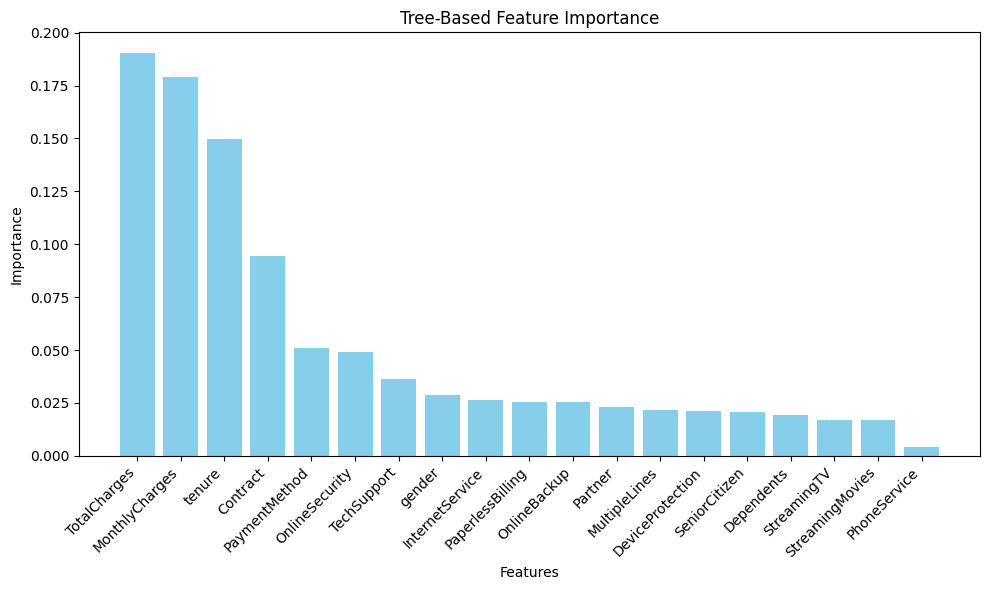

In [24]:
# Sorting feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Tree-Based Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



In [25]:
#selecting first 6 features based on importance
top_6= feature_importance_df['Feature'].values[:6]
top_6

array(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
       'PaymentMethod', 'OnlineSecurity'], dtype=object)

In [26]:
x_top_6= x[top_6]
x_top_6.head()

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity
0,29.85,29.85,1,0,2,0
1,1889.50,56.95,34,1,3,2
2,108.15,53.85,2,0,3,2
3,1840.75,42.30,45,1,0,2
4,151.65,70.70,2,0,2,0


In [27]:
#EXPLORATORY DATA ANALYSIS

In [28]:
import matplotlib.pyplot as plt

In [29]:
import seaborn as sns

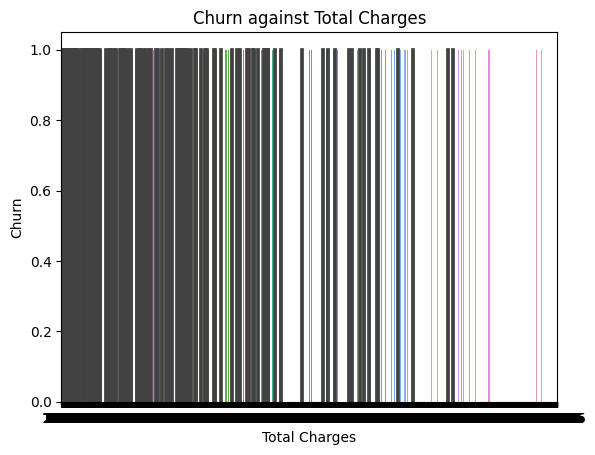

In [30]:
sns.barplot( x= 'TotalCharges', y='Churn',data=new_df)
plt.title('Churn against Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Churn')
plt.show()

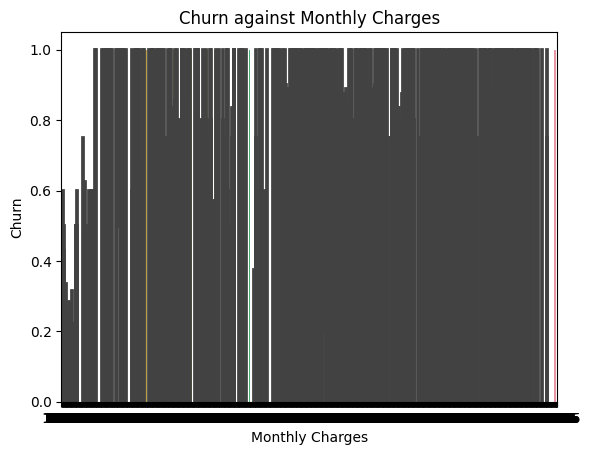

In [31]:
sns.barplot( x= 'MonthlyCharges', y='Churn',data=new_df)
plt.title('Churn against Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.show()

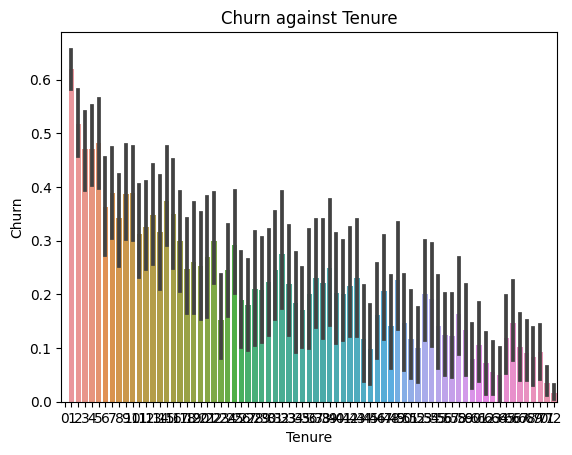

In [32]:
sns.barplot( x= 'tenure', y='Churn',data=new_df)
plt.title('Churn against Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.show()

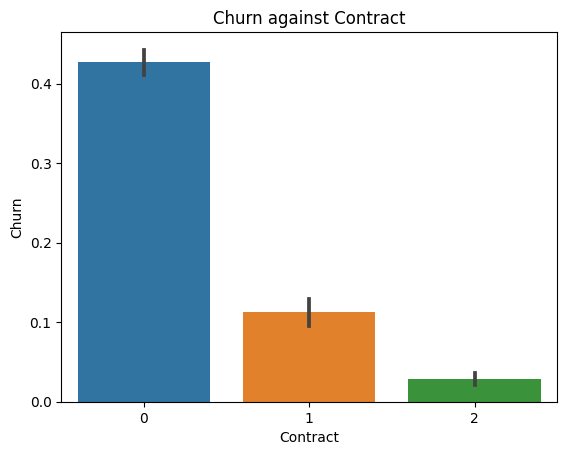

In [33]:
sns.barplot( x= 'Contract', y='Churn',data=new_df)
plt.title('Churn against Contract')
plt.xlabel('Contract')
plt.ylabel('Churn')
plt.show()

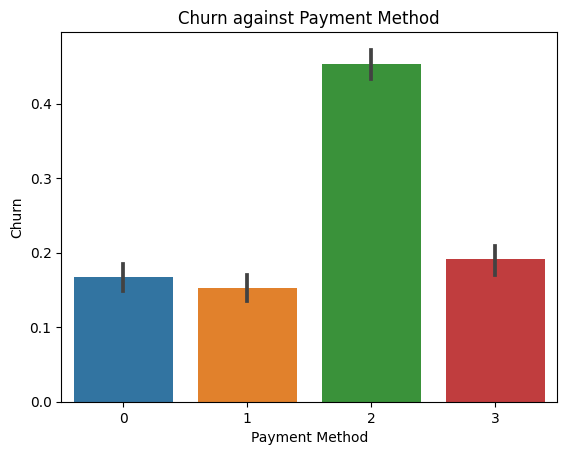

In [34]:
sns.barplot( x= 'PaymentMethod', y='Churn',data=new_df)
plt.title('Churn against Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn')
plt.show()

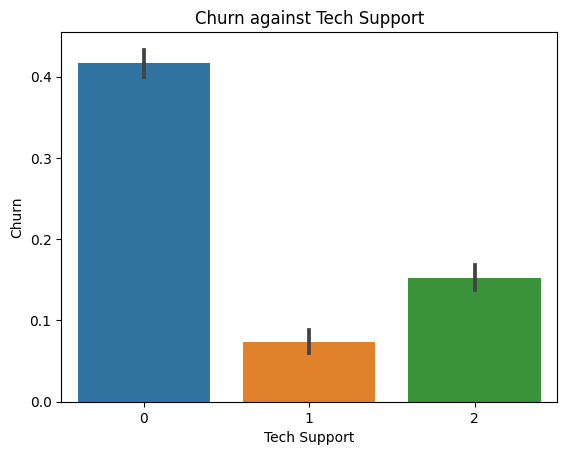

In [35]:
sns.barplot( x= 'TechSupport', y='Churn',data=new_df)
plt.title('Churn against Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Churn')
plt.show()

In [36]:
#MLP MODEL

In [36]:
!pip install tensorflow scikeras scikit-learn

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import matthews_corrcoef
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [38]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Split the data into train and test sets while preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply random oversampling to the training data
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [40]:
# Print the original and resampled class distribution
print("Original class distribution:", np.bincount(y_train))
print("Resampled class distribution:", np.bincount(Y_train_resampled))

Original class distribution: [4656 1682]
Resampled class distribution: [4656 4656]


In [41]:
y_train.value_counts()

0    4656
1    1682
Name: Churn, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [42]:
num_classes=1
epochs=30
batch_size=20

In [32]:
def create_model(dropout_rate, weight_constraint,activation):
  # create modeloptimizer=optimizer

  inputs = tf.keras.Input(shape=(X_train.shape[1],))
  input = tf.keras.layers.Dense((18), activation=activation)(inputs)

  x= tf.keras.layers.Dropout(dropout_rate)(input)
  first=tf.keras.layers.Dense(36, activation=activation)(x)

  x= tf.keras.layers.Dropout(dropout_rate)(first)
  second=tf.keras.layers.Dense(36, activation=activation)(x)

  # Add output layer with softmax activation
  output = tf.keras.layers.Dense(num_classes, activation='sigmoid')(second)

  # optimizer = "SGD"
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

  # Create the model
  m = tf.keras.Model(inputs=inputs, outputs=output)
  m.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return m

In [45]:
model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
dropout_rate = [0.3, 0.5]
weight_constraint = [3.0, 5.0]

activation = ['relu']

param_grid = dict(model__dropout_rate=dropout_rate,
                  model__weight_constraint=weight_constraint,
                  model__activation=activation)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring='accuracy')

# Initialize lists to store outer fold results
outer_scores = []
best_models = []
for train_idx, val_idx in outer_cv.split(X_train_resampled, Y_train_resampled):
    X_train_outer, X_val_outer = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
    y_train_outer, y_val_outer = Y_train_resampled.iloc[train_idx], Y_train_resampled.iloc[val_idx]

    # Perform hyperparameter tuning in the inner loop
    grid_search.fit(X_train_outer, y_train_outer)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Evaluate the best model on the outer validation set
    y_pred_outer = best_model.predict(X_val_outer)
    accuracy = accuracy_score(y_val_outer, y_pred_outer)
    outer_scores.append(accuracy)

In [45]:
from sklearn.metrics import classification_report

In [47]:
print("Outer CV Scores:", outer_scores)
print("Mean Accuracy:", np.mean(outer_scores))
print("Standard Deviation:", np.std(outer_scores))

# Train the final model on the entire training set with the best hyperparameters
final_best_model_mlp = grid_search.best_estimator_
print("The best estimator:",grid_search.best_estimator_, "\n")
final_best_model_mlp.fit(X_train_resampled, Y_train_resampled,epochs=epochs, batch_size=batch_size, verbose=0)


# Evaluate the model and obtain predicted probabilities
y_pred = final_best_model_mlp.predict(X_test)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_pred)
auc_mlp = round(metrics.roc_auc_score(y_test, y_pred), 4)
print("AUC:",auc_mlp)
y_pred=np.round(final_best_model_mlp.predict(X_test)).ravel()
print("\nCR by library method=\n",
          classification_report(y_test, y_pred))

Outer CV Scores: [0.642512077294686, 0.5437466451959205, 0.5912996777658431, 0.5445757250268528, 0.60687432867884]
Mean Accuracy: 0.5858016907924285
Standard Deviation: 0.03783796764868818
The best estimator: KerasClassifier(
	model=<function create_model at 0x7966927ad5a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=20
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	model__activation=relu
	model__dropout_rate=0.3
	model__weight_constraint=5.0
	class_weight=None
) 

AUC: 0.7193

CR by library method=
               precision    recall  f1-score   support

           0       0.89      0.65      0.75       518
           1       0.45      0.79      0.57       187

    accuracy                           0.69       705
   macro avg       0.67      0.72      0.66       705
weighted avg       0.78      0.69      0.71       705



In [49]:
grid_search.best_params_

{'model__activation': 'relu',
 'model__dropout_rate': 0.3,
 'model__weight_constraint': 5.0}

In [43]:
 final_model = create_model(0.3, 5.0,"relu")


In [46]:
final_model.fit(X_train_resampled, Y_train_resampled,epochs=epochs, batch_size=batch_size, verbose=0)


# Evaluate the model and obtain predicted probabilities
y_pred = final_model.predict(X_test)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_pred)
auc_mlp = round(metrics.roc_auc_score(y_test, y_pred), 4)
print("AUC:",auc_mlp)
y_pred=np.round(final_model.predict(X_test)).ravel()
print("\nCR by library method=\n",
          classification_report(y_test, y_pred))

23/23 [==============================] - 0s 2ms/step
AUC: 0.8534
23/23 [==============================] - 0s 2ms/step

CR by library method=
               precision    recall  f1-score   support

           0       0.90      0.76      0.83       518
           1       0.54      0.78      0.64       187

    accuracy                           0.77       705
   macro avg       0.72      0.77      0.73       705
weighted avg       0.81      0.77      0.78       705



In [47]:
final_model.save('mlp_keras.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
